In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import folium
import numpy as np


plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
from IPython.display import display

In [22]:
df = pd.read_csv('data/df_add.csv')
df.head()

,time,latitude,longitude,elevation,pointxyz,distance,mph,elevation_change,cum_elevation,cum_distance,second,elapsed_time,step_feet,moving_time
0,2018-04-07 10:30:03+00:00,38.767303,-77.408430,104.000000,"(38.76730288378894, -77.40843029692769, 104.0)",0.000000,0.000000,0.000000,0.000000,0.000000,0,0:00:00,0.000000,0
1,2018-04-07 10:30:04+00:00,38.767300,-77.408428,104.000000,"(38.76729995012283, -77.40842811763287, 104.0)",0.000234,0.843264,0.000000,0.000000,0.000234,1,0:00:01,1.236787,0
2,2018-04-07 10:30:06+00:00,38.767277,-77.408418,104.000000,"(38.76727723516524, -77.40841797553003, 104.0)",0.001662,5.982624,0.000000,0.000000,0.001896,2,0:00:02,8.774515,1
3,2018-04-07 10:30:09+00:00,38.767222,-77.408395,104.400002,"(38.767221914604306, -77.40839484147727, 104.4...",0.004020,14.473188,0.400002,0.400002,0.005916,3,0:00:03,21.227342,1
4,2018-04-07 10:30:12+00:00,38.767160,-77.408343,105.000000,"(38.7671600561589, -77.40834253840148, 105.0)",0.005119,18.429192,0.599998,1.000000,0.011036,4,0:00:04,27.029482,1


# Segments
 ### I want to assign a grade designation by some unit of distance (15 ft?  15 seconds? or consistant grade sticks together whether long or short?)
 
 ### I want to create a function that will find loops or will identify when you get back to start...
 ### I want to create segments @ natural stopping points (roads/lights/aid stations) where speed is close to 0. 
 ### do segments first, then get rid of the stopped areas (or just label them differently and can sum moving time by count and get "seconds
 ### cycle between moving seg1, stopped segment (i.e. time spent at aid or at light) and then after a stop then seg2 , and so on.

In [23]:
df.tail()

,time,latitude,longitude,elevation,pointxyz,distance,mph,elevation_change,cum_elevation,cum_distance,second,elapsed_time,step_feet,moving_time
14960,2018-04-07 20:56:28+00:00,38.767945,-77.408353,81.199997,"(38.767944518476725, -77.40835259668529, 81.19...",0.009672,34.818804,0.199997,-22.800003,52.284222,14960,4:09:20,51.067579,1
14961,2018-04-07 20:56:34+00:00,38.767739,-77.408374,79.800003,"(38.76773874275386, -77.40837405435741, 79.800...",0.014265,51.352776,-1.399994,-24.199997,52.298487,14961,4:09:21,75.317405,1
14962,2018-04-07 20:56:40+00:00,38.767551,-77.408367,81.400002,"(38.767550652846694, -77.40836734883487, 81.40...",0.013001,46.802844,1.599998,-22.599998,52.311487,14962,4:09:22,68.644171,1
14963,2018-04-07 20:56:41+00:00,38.767522,-77.408366,81.400002,"(38.767522322013974, -77.40836625918746, 81.40...",0.001958,7.050060,0.000000,-22.599998,52.313446,14963,4:09:23,10.340088,1
14964,2018-04-07 20:56:44+00:00,38.767476,-77.408356,81.800003,"(38.76747605390847, -77.40835561417043, 81.800...",0.003248,11.692260,0.400002,-22.199997,52.316694,14964,4:09:24,17.148648,1


In [24]:
full_miles = df['distance'].sum()//1
full_miles

52.0

In [25]:
# find the point that is at each mile completion.  we know how many miles it is.  
# find the cum miles that is closest to the whole numbers and label it/label all points as being part of x mile

def find_neighbours(value, df, colname):
    exactmatch = df[df[colname] == value]
    if not exactmatch.empty:
        return exactmatch.index
    else:
        lowerneighbour_ind = df[df[colname] < value][colname].idxmax()
        upperneighbour_ind = df[df[colname] > value][colname].idxmin()
        return [lowerneighbour_ind, upperneighbour_ind] 

junder,jover = find_neighbours(1,df,'cum_distance')
df[junder:jover+1]


,time,latitude,longitude,elevation,pointxyz,distance,mph,elevation_change,cum_elevation,cum_distance,second,elapsed_time,step_feet,moving_time
169,2018-04-07 10:39:04+00:00,38.764803,-77.408777,86.599998,"(38.76480281352997, -77.40877697244287, 86.599...",0.00169,6.082956,-0.400002,-17.400002,0.999797,169,0:02:49,8.921669,1
170,2018-04-07 10:39:05+00:00,38.764786,-77.408768,86.199997,"(38.764786468818784, -77.40876791998744, 86.19...",0.00123,4.428432,-0.400002,-17.800003,1.001027,170,0:02:50,6.495034,1


In [5]:
print(df['cum_distance'][junder]//1)
print(df['cum_distance'][jover]//1)


0.0
1.0


In [7]:
# add mile indicators
def make_mile_segments(row):
    return row['cum_distance']//1 +1
df['mile_num'] = df.apply(make_mile_segments, axis=1)
df['mile_num'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53.])

In [8]:
# time_by_mile
def mile_time(mile):
    seconds = int(df[df['mile_num'] == mile]['second'].count())
    str_time = str(datetime.timedelta(seconds=seconds))
    return str_time
mile_time(1)

'0:02:50'

In [9]:
# for each mile find the mile time
def run_miles(df):
    mile_analysis=[]        
    for i in df['mile_num'].unique():
        if i == 0:
            continue
        else:
            mile_analysis.append(mile_time(i))
    return mile_analysis
    

In [10]:
# find the begining location of each mile
def mile_marker_loc(df):
    mile_markers = []

    for i in range(1,len(df['mile_num'].unique())):
        junder,jover  = find_neighbours(i, df, 'cum_distance')
        mile_markers.append(jover)
    return mile_markers

In [11]:
# create an custom segment based on a unit - fraction of mile
def section_distance(df,unit):
    return df['cum_distance']//unit +1

df['grade_section'] = df.apply(section_distance,unit=.1, axis=1)


In [16]:
# find the starting location of the custom segments
def grade_marker_loc(df):
    grade_markers = []
    for i in range(1,len(df['grade_section'].unique())):
        junder,jover  = find_neighbours(i/10, df, 'cum_distance')
        grade_markers.append(jover)
    return grade_markers



In [17]:
# find the gradient of the custom 'grade_section"
unit = 0.1
prev = df['elevation'][0]

# elevation is in Meters but distance is in miles. so convert the elevation into miles
conversion_factor = 0.62137119
gradient =[]

for i in range(len(df['grade_section'].unique())):
    el_diff = df['elevation'][i] - prev
    unit_gradient = el_diff/(unit/conversion_factor*1000)
    gradient.append(unit_gradient)
    prev = df['elevation'][i]

gradient[0:10]

[0.0,
 0.0,
 0.0,
 0.0024854942413719172,
 0.003728217658628081,
 0.0024854942413719172,
 0.0012427234172561641,
 0.0012427708241156646,
 0.0012427234172562526,
 0.0012427234172562526]

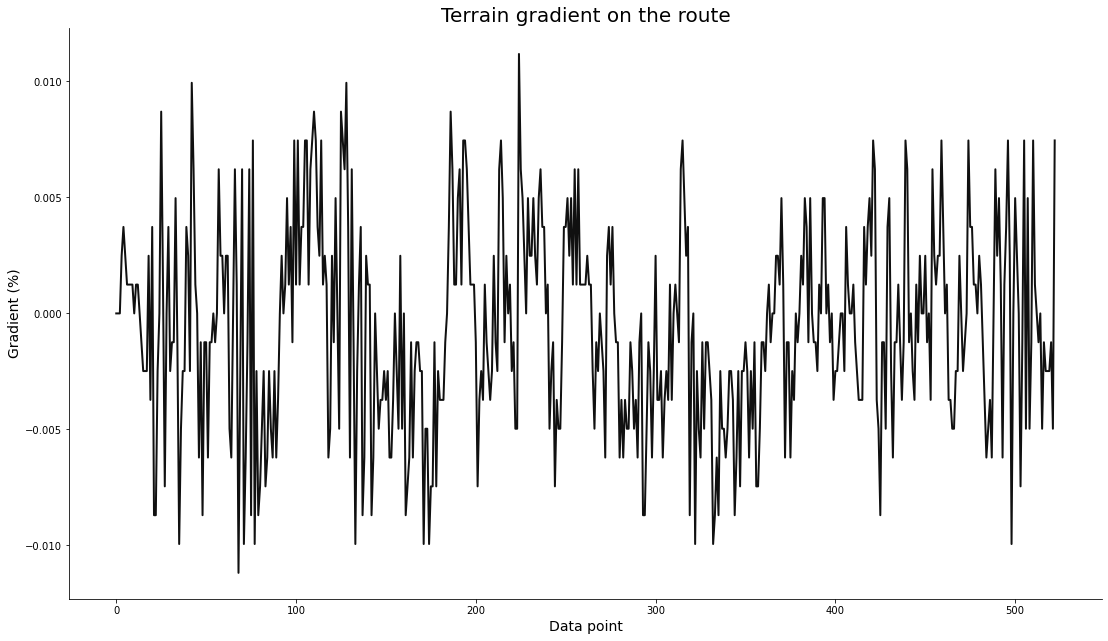

In [18]:


plt.figure(figsize=(18.5, 10.5))
plt.title('Terrain gradient on the route', size=20)
plt.xlabel('Data point', size=14)
plt.ylabel('Gradient (%)', size=14)
plt.plot(np.arange(len(gradient)), gradient, lw=2, color='#101010');

In [19]:
from folium.features import DivIcon

def number_DivIcon(color,number):
    """ Create a 'numbered' icon
    
    """
    icon = DivIcon(
            icon_size=(150,36),
            icon_anchor=(14,40),
#             html='<div style="font-size: 18pt; align:center, color : black">' + '{:02d}'.format(num+1) + '</div>',
            html="""<span class="fa-stack " style="font-size: 12pt" >>
                    <!-- The icon that will wrap the number -->
                    <span class="fa fa-circle-o fa-stack-2x" style="color : {:s}"></span>
                    <!-- a strong element with the custom content, in this case a number -->
                    <strong class="fa-stack-1x">
                         {:02d}  
                    </strong>
                </span>""".format(color,number)
        )
    return icon
    
col_hex = ['#440154',
 '#481a6c',
 '#472f7d',
 '#414487',
 '#39568c',
 '#31688e',
 '#2a788e',
 '#23888e',
 '#1f988b',
 '#22a884',
 '#35b779',
 '#54c568',
 '#7ad151',
 '#a5db36',
 '#d2e21b'
 ]

In [20]:
# Graph mile markers on map with mile time on click - folium
lat_map = df['latitude'].mean()
lon_map = df['longitude'].mean()
route_map = folium.Map(
    location=[lat_map, lon_map],
    zoom_start=14,
    tiles='OpenStreetMap',
    width= 1000,
    height=800
)
coordinates = [tuple(x) for x in df[['latitude','longitude']].to_numpy()]
folium.PolyLine(coordinates, weight=6).add_to(route_map)

# find mile markers
locations_to_chart = mile_marker_loc(df)
# find mile times
mile_times = run_miles(df)
num =0
mile=1

for i in locations_to_chart:
    mile_hex = mile//15+1
    loc = [df['latitude'][i], df['longitude'][i]]
    folium.Marker(
        location=loc,
        popup="Mile " + '{:02d}'.format(mile),
        icon=folium.Icon(color='white',icon_color='white'),
        markerColor=col_hex[mile_hex]
    ).add_to(route_map)

    folium.Marker(
        location=loc,
        popup="Mile " + '{:02d}'.format(mile)+ " "+ mile_times[mile-1],
        icon= number_DivIcon(col_hex[mile_hex],mile)
    ).add_to(route_map)
    mile+=1



display(route_map)

In [17]:
16//15+1

2

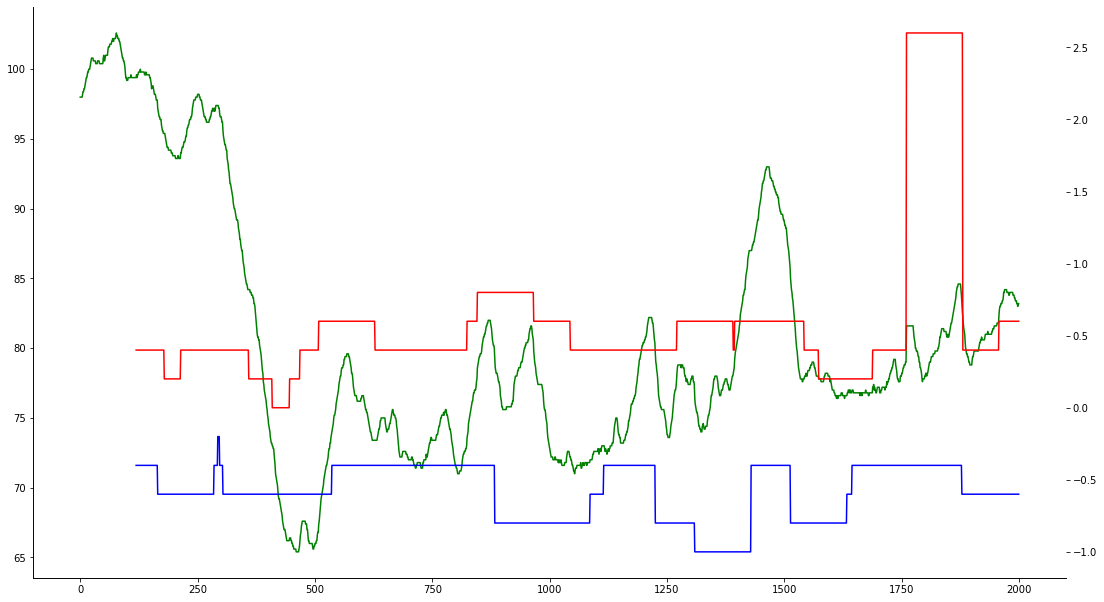

In [18]:
# Experiment with mean max and min on rolling elevation change
elv_period = 120
fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax2 = ax1.twinx()
ax1.plot(df.index[0:2000],df['elevation'][0:2000], c='g')
# ax2.plot(df.index[0:2000],df['elevation_change'].rolling(60).mean()[0:2000], c='r')
ax2.plot(df.index[0:2000],df['elevation_change'].rolling(elv_period).max()[0:2000], c='r')
ax2.plot(df.index[0:2000],df['elevation_change'].rolling(elv_period).min()[0:2000], c='b')



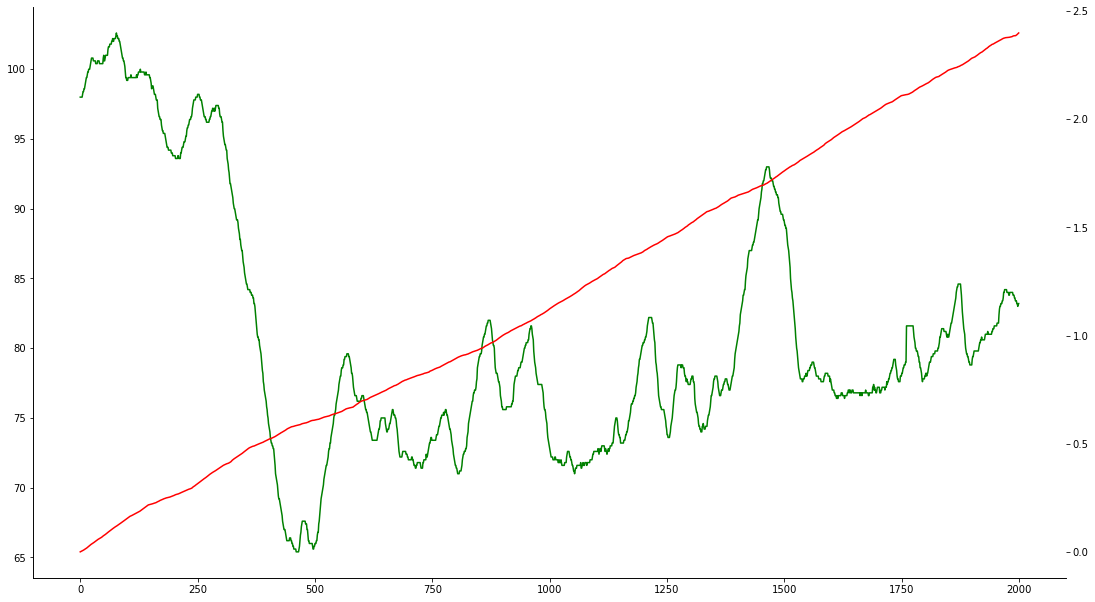

In [19]:
elv_period = 120
fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax2 = ax1.twinx()
ax1.plot(df.index[0:2000],df['elevation'][0:2000], c='g')
# ax2.plot(df.index[0:2000],df['elevation_change'].rolling(60).mean()[0:2000], c='r')
ax2.plot(df.index[0:2000],df['cum_distance'][0:2000], c='r')

# Preserve changes in new CSV

In [20]:
df.to_csv('data/df_mile.csv', index=False)
df.describe()

,latitude,longitude,elevation,distance,mph,elevation_change,cum_elevation,cum_distance,second,step_feet,moving_time,mile_num,grade_section
count,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000,59640.000000
mean,38.580718,-77.379950,45.231207,0.001103,3.972317,-0.000999,-52.768793,34.999681,29819.500000,5.826065,0.963984,35.499665,350.498122
std,0.012729,0.025952,36.452463,0.000458,1.649963,0.165107,36.452463,18.875987,17216.729364,2.419945,0.186332,18.879867,188.761038
min,38.557794,-77.424799,-27.200001,0.000000,0.000000,-1.199997,-125.200001,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,38.571374,-77.406517,19.400000,0.000800,2.878974,0.000000,-78.600000,19.706789,14909.750000,4.222495,1.000000,20.000000,198.000000
50%,38.576993,-77.375818,43.400002,0.001087,3.912318,0.000000,-54.599998,35.982171,29819.500000,5.738066,1.000000,36.000000,360.000000
75%,38.592803,-77.354579,74.800003,0.001391,5.009040,0.000000,-23.199997,51.289284,44729.250000,7.346592,1.000000,52.000000,513.000000
max,38.608468,-77.342196,123.800003,0.002777,9.996084,2.599998,25.800003,65.808048,59639.000000,14.660923,1.000000,66.000000,659.000000
